#Спектральный анализ аудио файлов.

Загрузите файлы:
* 440_a.wav  
* 440_gen.wav

In [ ]:
# Проверим что файлы на месте
!ls

440_a.wav  440_gen.wav	sample_data


Импортируем нужные библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft
from scipy import signal
from scipy.io import wavfile

##Работа с **wav**- файлами

###**Чтение**

In [ ]:
filepath = "./440_gen.wav"

samplerate, x = wavfile.read(filepath)

print('samplerate:', samplerate, x.ndim)

samplerate: 44100 1


###**Прослушивание**

In [ ]:
from IPython.display import Audio, display

In [ ]:
def Play(x, fd):
  display(Audio(x, rate=fd, autoplay=False))

In [ ]:
Play(x, samplerate)

###**Сохранение**

In [ ]:
norm_sig = np.int16((x.real) * (32767 / x.real.max()))
wavfile.write("./440_new.wav", samplerate, norm_sig)

In [ ]:
Play(norm_sig, samplerate)

##Работа с **mp3**-файлами

Загрузите файл:
* str_a.mp3  

####Можно использовать библиотеку **pydub**

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydub

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

###**Чтение**

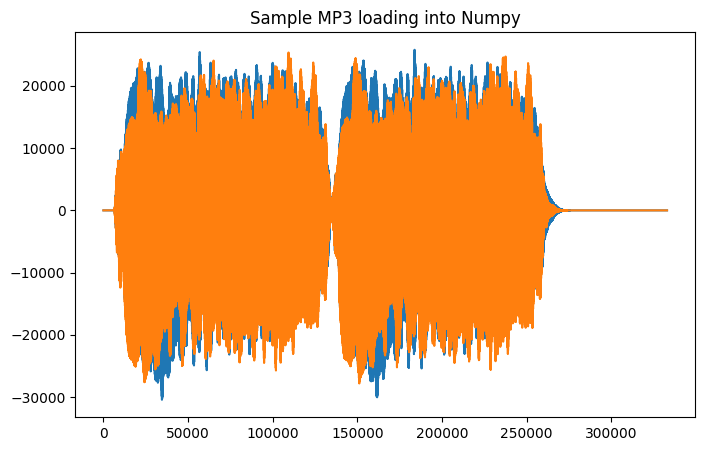

In [ ]:
audio_file = 'str_a.mp3'
sr, x = read(audio_file)

plt.figure(figsize=(8,5))
plt.plot(x)
plt.title("Sample MP3 loading into Numpy")
plt.show()


In [ ]:
print(sr, x.shape)

44100 (332928, 2)


In [ ]:
# Для стерео синала усредняем каналы
x = x.mean(axis=1)

In [ ]:
Play(x, sr)

####Для преобразования в numpyarray можно использовать библиотеку **audio2numpy**

In [ ]:
!pip install audio2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=d8afc98ffd6e3072ac2754378ebc2e1dd67f3d08fabb370fc99888676c6b6147
  Stored in directory: /root/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [ ]:
import audio2numpy as a2n
x, sr = a2n.audio_from_file("str_a.mp3")

##Спектральный анализ аудио
Хотим исследовать влияние различных окон.

Пишем функции, чтоб удобно их вызывать для разных файлов, окон...

###**Задание 1**:
* Выполните преобразование Фурье и посмотрите спектр для файла "440_a.wav".
* Попробуйте различные оконные функции.

###Анализируем файл 440_a.wav

In [ ]:
filepath = "./440_gen.wav"

# Сколько отсчетов сигнала берем для вычисления спектра
N = 1024*4

###**Задание 2**:
* Выполните преобразование Фурье и посмотрите спектр для файла "str_a.mp3".

###Анализируем файл str_a.mp3

####**Анализ пиков спектрограммы**
Анализируя спектр, хотим понять что за нота звучала в аудио.

##Как меняется спектр во времени
Построение спектрограммы

###**Задание 3**:
* Постройте спектрограмму для файла "440_a.wav".

In [ ]:
from numpy.ma.core import shape

filepath = "./440_a.wav"

samplerate, x = wavfile.read(filepath)
x= x.mean(axis=1)

#spectrogramm = np.ndarray(shape=(...))
#for i in range(...):
#  frame = ...


Рисуем вычисленную спектрограмму

In [ ]:
plt.imshow(spectrogramm.T, cmap='plasma', aspect='auto',  extent = [0, 10, samplerate//2, 0])
plt.show()

In [ ]:
plt.imshow(spectrogramm[0:10, 0:1000].T, cmap='plasma', aspect='auto',  extent = [0, 10, samplerate//2, 0])
plt.show()

###Встроенные функции
В matplotlib есть возможность рисования гистограммы, функция specgram.

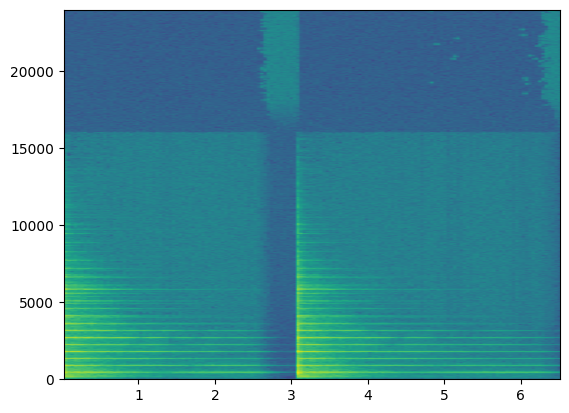

In [ ]:
win = signal.get_window('hann', N)
Sxx, ff, tt, img = plt.specgram(x, Fs=samplerate, NFFT=N, noverlap=N//2, window=win)


В модуле signal есть возможность вычисления спектрограммы, функция spectrogram.

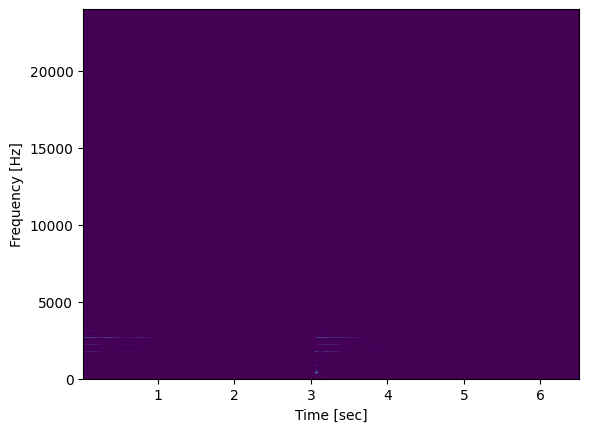

In [ ]:
win = signal.get_window('hann', N)
ff, tt, Spec = signal.spectrogram(x, samplerate, nperseg=N, noverlap=N//2, window=win)
plt.pcolormesh(tt, ff, Spec, shading='auto', cmap = 'viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
print(Spec.shape, Sxx.shape)
print(Sxx[0:5, 0:5])
print(Spec[0:5, 0:5])

(2049, 152) (2049, 152)
[[0.06890396 0.00994269 0.12576951 0.05531947 0.01316732]
 [0.25602176 0.10542606 0.14743737 0.10591135 0.03097646]
 [0.49975932 0.05314904 0.16053832 0.04946098 0.01219621]
 [0.85265807 0.77510375 0.29715837 0.27725721 0.22954651]
 [1.2180685  1.22061658 0.01133272 1.18985745 0.54759087]]
[[0.95126792 0.28430119 0.40340331 0.35785829 7.7402122 ]
 [0.55412996 0.32103614 0.11933025 0.33827444 3.52051516]
 [0.49975932 0.05314904 0.16053832 0.04946098 0.01219621]
 [0.85265807 0.77510375 0.29715837 0.27725721 0.22954651]
 [1.2180685  1.22061658 0.01133272 1.18985745 0.54759087]]


Значения совпадают кроме значений 0, 1 по частоте. Т.е. Нулевая частота и следующий отсчет.

* Удалите их перед отображением.

А при рисовании надо еще перейти к Децибелам.